Data Science Project

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [2]:
#Using Fremont, California as the location and finding out its coordinates
address = 'Fremont, California, USA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.5482697 -121.9885719


In [3]:
#Searching an area within 10kms
search_query = 'Restaurant'
radius = 10000
print(search_query + ' .... OK!')

Restaurant .... OK!


In [4]:
#Foursqaure API credentitals
CLIENT_ID = 'WSGPSOPIBK50UKK0N0AP5QOZBQSN2J5WUBW3DYMENGCI0M45' # your Foursquare ID
CLIENT_SECRET = 'T10G0RCOH53RYG3WROR4CYJII3ASBYTOENMC4MQGA0NUR1M5' # your Foursquare Secret
VERSION = '20201011'
LIMIT = 30

In [5]:
#Address and search using Foursqaure API URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=WSGPSOPIBK50UKK0N0AP5QOZBQSN2J5WUBW3DYMENGCI0M45&client_secret=T10G0RCOH53RYG3WROR4CYJII3ASBYTOENMC4MQGA0NUR1M5&ll=37.5482697,-121.9885719&v=20201011&query=Restaurant&radius=10000&limit=30'

In [6]:
#Storing the requests in variable results
results = requests.get(url).json()

In [8]:
#Assigning the relevant part of JSON to venues
venues = results['response']['venues']
df = pd.json_normalize(venues)
df

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.crossStreet
0,4a7f4769f964a52089f31fe3,BJ's Restaurant & Brewhouse,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",v-1602560481,False,5699 Mowry Ave,37.528034,-122.005717,"[{'label': 'display', 'lat': 37.52803401317205...",2713,...,United States,"[5699 Mowry Ave, Newark, CA 94560, United States]",476001,https://www.grubhub.com/restaurant/bjs-restaur...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,559117068,NaN
1,5918e4aabed48311a135f616,Jack's Restaurant & Bar,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1602560481,False,1029 Newpark Mall,37.526140,-122.002282,"[{'label': 'display', 'lat': 37.52613980472319...",2744,...,United States,"[1029 Newpark Mall, Newark, CA 94560, United S...",2120340,https://www.grubhub.com/restaurant/jacks-resta...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
2,4a76357ef964a5209ae21fe3,Miso Japanese Restaurant,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",v-1602560481,False,3810 Mowry Ave,37.549515,-121.986418,"[{'label': 'display', 'lat': 37.54951536655426...",235,...,United States,"[3810 Mowry Ave, Fremont, CA 94538, United Sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,59376e9d46e1b62d0cfc3168,Metropole Restaurant,"[{'id': '503288ae91d4c4b30a586d67', 'name': 'A...",v-1602560481,False,3860 Mowry Ave,37.549450,-121.986366,"[{'label': 'display', 'lat': 37.5494499206543,...",234,...,United States,"[3860 Mowry Ave, Fremont, CA 94538, United Sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4b3bb524f964a520507925e3,La Sen Vietnamese Restaurant,"[{'id': '4bf58dd8d48988d14a941735', 'name': 'V...",v-1602560481,False,181 Fremont Hub,37.546326,-121.987121,"[{'label': 'display', 'lat': 37.54632645027033...",251,...,United States,"[181 Fremont Hub, Fremont, CA 94538, United St...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4f67daaee4b0658d1190b02c,Miga Korean Restaurant,"[{'id': '4bf58dd8d48988d113941735', 'name': 'K...",v-1602560481,False,39033 State St,37.550260,-121.985494,"[{'label': 'display', 'lat': 37.55026047608957...",350,...,United States,"[39033 State St (Mowry Avenue), Fremont, CA 94...",1677345,https://www.grubhub.com/restaurant/miga-korean...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,Mowry Avenue
6,4b809e60f964a5207c8130e3,Li Zhou Seafood Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1602560481,False,36456 Fremont Blvd,37.562558,-122.014967,"[{'label': 'display', 'lat': 37.56255777667747...",2820,...,United States,"[36456 Fremont Blvd (at Alder Ave.), Fremont, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,at Alder Ave.
7,4b4927fef964a520206826e3,Strizzi's Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1602560481,False,2740 Mowry Ave,37.554490,-121.981707,"[{'label': 'display', 'lat': 37.55448979496420...",920,...,United States,"[2740 Mowry Ave (at Paseo Padre Pkwy.), Fremon...",1307993,https://www.grubhub.com/restaurant/strizzis-27...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,at Paseo Padre Pkwy.
8,4b3ebd85f964a5209ca125e3,Vung Tau III Restaurant,"[{'id': '4bf58dd8d48988d14a941735', 'name': 'V...",v-1602560481,False,6092 Mowry Ave,37.524078,-122.007962,"[{'label': 'display', 'lat': 37.52407804942912...",3190,...,United States,"[6092 Mowry Ave, Newark, CA 94560, United States]",2183810,https://www.grubhub.com/restaurant/vung-tau-re...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
9,4ce1f68d7e2e236a405f931b,Nijo Castle Sushi & Teppan Yaki Japanese Resta...,"

In [9]:
#Keeping only columns that include venue name and other fields related to the location
filtered_columns = ['name', 'categories'] + [col for col in df.columns if col.startswith('location.')] + ['id']
df2 = df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df2['categories'] = df2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df2.columns = [column.split('.')[-1] for column in df2.columns]

df2

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,BJ's Restaurant & Brewhouse,Brewery,5699 Mowry Ave,37.528034,-122.005717,"[{'label': 'display', 'lat': 37.52803401317205...",2713,94560,US,Newark,CA,United States,"[5699 Mowry Ave, Newark, CA 94560, United States]",NaN,4a7f4769f964a52089f31fe3
1,Jack's Restaurant & Bar,American Restaurant,1029 Newpark Mall,37.526140,-122.002282,"[{'label': 'display', 'lat': 37.52613980472319...",2744,94560,US,Newark,CA,United States,"[1029 Newpark Mall, Newark, CA 94560, United S...",NaN,5918e4aabed48311a135f616
2,Miso Japanese Restaurant,Japanese Restaurant,3810 Mowry Ave,37.549515,-121.986418,"[{'label': 'display', 'lat': 37.54951536655426...",235,94538,US,Fremont,CA,United States,"[3810 Mowry Ave, Fremont, CA 94538, United Sta...",NaN,4a76357ef964a5209ae21fe3
3,Metropole Restaurant,Afghan Restaurant,3860 Mowry Ave,37.549450,-121.986366,"[{'label': 'display', 'lat': 37.5494499206543,...",234,94538,US,Fremont,CA,United States,"[3860 Mowry Ave, Fremont, CA 94538, United Sta...",NaN,59376e9d46e1b62d0cfc3168
4,La Sen Vietnamese Restaurant,Vietnamese Restaurant,181 Fremont Hub,37.546326,-121.987121,"[{'label': 'display', 'lat': 37.54632645027033...",251,94538,US,Fremont,CA,United States,"[181 Fremont Hub, Fremont, CA 94538, United St...",NaN,4b3bb524f964a520507925e3
5,Miga Korean Restaurant,Korean Restaurant,39033 State St,37.550260,-121.985494,"[{'label': 'display', 'lat': 37.55026047608957...",350,94538,US,Fremont,CA,United States,"[39033 State St (Mowry Avenue), Fremont, CA 94...",Mowry Avenue,4f67daaee4b0658d1190b02c
6,Li Zhou Seafood Restaurant,Chinese Restaurant,36456 Fremont Blvd,37.562558,-122.014967,"[{'label': 'display', 'lat': 37.56255777667747...",2820,94536,US,Fremont,CA,United States,"[36456 Fremont Blvd (at Alder Ave.), Fremont, ...",at Alder Ave.,4b809e60f964a5207c8130e3
7,Strizzi's Restaurant,Italian Restaurant,2740 Mowry Ave,37.554490,-121.981707,"[{'label': 'display', 'lat': 37.55448979496420...",920,94538,US,Fremont,CA,United States,"[2740 Mowry Ave (at Paseo Padre Pkwy.), Fremon...",at Paseo Padre Pkwy.,4b4927fef964a520206826e3
8,Vung Tau III Restaurant,Vietnamese Restaurant,6092 Mowry Ave,37.524078,-122.007962,"[{'label': 'display', 'lat': 37.52407804942912...",3190,94560,US,Newark,CA,United States,"[6092 Mowry Ave, Newark, CA 94560, United States]",NaN,4b3ebd85f964a5209ca125e3
9,Nijo Castle Sushi & Teppan Yaki Japanese Resta...,Japanese Restaurant,39888 Balentine Dr,37.522258,-121.992336,"[{'label': 'display', 'lat': 37.52225845256566...",2914,94560,US,Newark,CA,United States,"[39888 Balentine Dr, Newark, CA 94560, United ...",NaN,4ce1f68d7e2e236a405f931b


In [10]:
#extracting venue id from dataset
venue_id_list=df2['id']

In [11]:
#Extracting the number of likes for each venue

url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[172, 25, 0, 2, 2, 14, 9, 11, 10, 40, 21, 0, 2, 2, 0, 0, 1, 0, 4, 16, 0, 13, 0, 0, 0, 0, 0, 9, 0, 3]


In [12]:
like_list2=pd.DataFrame(like_list)
like_list2.rename(columns = {0:'Like'}, inplace=True)
like_list2

,Like
0,172
1,25
2,0
3,2
4,2
5,14
6,9
7,11
8,10
9,40


In [13]:
#Adding the 'Like' column to main dataset
df3 = pd.concat([df2, like_list2], axis = 1)
df3

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id,Like
0,BJ's Restaurant & Brewhouse,Brewery,5699 Mowry Ave,37.528034,-122.005717,"[{'label': 'display', 'lat': 37.52803401317205...",2713,94560,US,Newark,CA,United States,"[5699 Mowry Ave, Newark, CA 94560, United States]",NaN,4a7f4769f964a52089f31fe3,172
1,Jack's Restaurant & Bar,American Restaurant,1029 Newpark Mall,37.526140,-122.002282,"[{'label': 'display', 'lat': 37.52613980472319...",2744,94560,US,Newark,CA,United States,"[1029 Newpark Mall, Newark, CA 94560, United S...",NaN,5918e4aabed48311a135f616,25
2,Miso Japanese Restaurant,Japanese Restaurant,3810 Mowry Ave,37.549515,-121.986418,"[{'label': 'display', 'lat': 37.54951536655426...",235,94538,US,Fremont,CA,United States,"[3810 Mowry Ave, Fremont, CA 94538, United Sta...",NaN,4a76357ef964a5209ae21fe3,0
3,Metropole Restaurant,Afghan Restaurant,3860 Mowry Ave,37.549450,-121.986366,"[{'label': 'display', 'lat': 37.5494499206543,...",234,94538,US,Fremont,CA,United States,"[3860 Mowry Ave, Fremont, CA 94538, United Sta...",NaN,59376e9d46e1b62d0cfc3168,2
4,La Sen Vietnamese Restaurant,Vietnamese Restaurant,181 Fremont Hub,37.546326,-121.987121,"[{'label': 'display', 'lat': 37.54632645027033...",251,94538,US,Fremont,CA,United States,"[181 Fremont Hub, Fremont, CA 94538, United St...",NaN,4b3bb524f964a520507925e3,2
5,Miga Korean Restaurant,Korean Restaurant,39033 State St,37.550260,-121.985494,"[{'label': 'display', 'lat': 37.55026047608957...",350,94538,US,Fremont,CA,United States,"[39033 State St (Mowry Avenue), Fremont, CA 94...",Mowry Avenue,4f67daaee4b0658d1190b02c,14
6,Li Zhou Seafood Restaurant,Chinese Restaurant,36456 Fremont Blvd,37.562558,-122.014967,"[{'label': 'display', 'lat': 37.56255777667747...",2820,94536,US,Fremont,CA,United States,"[36456 Fremont Blvd (at Alder Ave.), Fremont, ...",at Alder Ave.,4b809e60f964a5207c8130e3,9
7,Strizzi's Restaurant,Italian Restaurant,2740 Mowry Ave,37.554490,-121.981707,"[{'label': 'display', 'lat': 37.55448979496420...",920,94538,US,Fremont,CA,United States,"[2740 Mowry Ave (at Paseo Padre Pkwy.), Fremon...",at Paseo Padre Pkwy.,4b4927fef964a520206826e3,11
8,Vung Tau III Restaurant,Vietnamese Restaurant,6092 Mowry Ave,37.524078,-122.007962,"[{'label': 'display', 'lat': 37.52407804942912...",3190,94560,US,Newark,CA,United States,"[6092 Mowry Ave, Newark, CA 94560, United States]",NaN,4b3ebd85f964a5209ca125e3,10
9,Nijo Castle Sushi & Teppan Yaki Japanese Resta...,Japanese Restaurant,39888 Balentine Dr,37.522258,-121.992336,"[{'label': 'display', 'lat': 37.52225845256566...",2914,94560,US,Newark,CA,United States,"[39888 Balentine Dr, Newark, CA 94560, United ...",NaN,4ce1f68d7e2e236a405f931b,40


In [14]:
#Sorting the table based on number of Likes in descending order
df4=df3.sort_values(by='Like', ascending=False)
df4

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id,Like
0,BJ's Restaurant & Brewhouse,Brewery,5699 Mowry Ave,37.528034,-122.005717,"[{'label': 'display', 'lat': 37.52803401317205...",2713,94560,US,Newark,CA,United States,"[5699 Mowry Ave, Newark, CA 94560, United States]",NaN,4a7f4769f964a52089f31fe3,172
9,Nijo Castle Sushi & Teppan Yaki Japanese Resta...,Japanese Restaurant,39888 Balentine Dr,37.522258,-121.992336,"[{'label': 'display', 'lat': 37.52225845256566...",2914,94560,US,Newark,CA,United States,"[39888 Balentine Dr, Newark, CA 94560, United ...",NaN,4ce1f68d7e2e236a405f931b,40
1,Jack's Restaurant & Bar,American Restaurant,1029 Newpark Mall,37.526140,-122.002282,"[{'label': 'display', 'lat': 37.52613980472319...",2744,94560,US,Newark,CA,United States,"[1029 Newpark Mall, Newark, CA 94560, United S...",NaN,5918e4aabed48311a135f616,25
10,Dino's Family Restaurant,Diner,36930 Fremont Blvd,37.561186,-122.012218,"[{'label': 'display', 'lat': 37.56118601195514...",2534,94536,US,Fremont,CA,United States,"[36930 Fremont Blvd (Washington), Fremont, CA ...",Washington,49e17bbef964a520cc611fe3,21
19,Fremont Afghan Kabob Restaurant,Afghan Restaurant,5379 Mowry Avenue,37.532548,-122.002112,"[{'label': 'display', 'lat': 37.53254849805143...",2119,94538,US,Fremont,CA,United States,"[5379 Mowry Avenue (Farewell Drive), Fremont, ...",Farewell Drive,54b86ec6498ea3c0de200e51,16
5,Miga Korean Restaurant,Korean Restaurant,39033 State St,37.550260,-121.985494,"[{'label': 'display', 'lat': 37.55026047608957...",350,94538,US,Fremont,CA,United States,"[39033 State St (Mowry Avenue), Fremont, CA 94...",Mowry Avenue,4f67daaee4b0658d1190b02c,14
21,Lazy Dog Restaurant & Bar,New American Restaurant,3100 Newpark Mall,37.525762,-122.006247,"[{'label': 'entrance', 'lat': 37.525835, 'lng'...",2951,94560,US,Newark,CA,United States,"[3100 Newpark Mall, Newark, CA 94560, United S...",NaN,5bce0a938c35dc002cea5211,13
7,Strizzi's Restaurant,Italian Restaurant,2740 Mowry Ave,37.554490,-121.981707,"[{'label': 'display', 'lat': 37.55448979496420...",920,94538,US,Fremont,CA,United States,"[2740 Mowry Ave (at Paseo Padre Pkwy.), Fremon...",at Paseo Padre Pkwy.,4b4927fef964a520206826e3,11
8,Vung Tau III Restaurant,Vietnamese Restaurant,6092 Mowry Ave,37.524078,-122.007962,"[{'label': 'display', 'lat': 37.52407804942912...",3190,94560,US,Newark,CA,United States,"[6092 Mowry Ave, Newark, CA 94560, United States]",NaN,4b3ebd85f964a5209ca125e3,10
27,Favorite Indian Restaurant,Indian Restaurant,1706 Decoto Rd,37.589032,-122.018766,"[{'label': 'display', 'lat': 37.58903175261095...",5261,94587,US,Union City,CA,United States,"[1706 Decoto Rd, Union City, CA 94587, United ...",NaN,50566203f136b6205e3920cc,9


In [16]:
df4['id']

0     4a7f4769f964a52089f31fe3
9     4ce1f68d7e2e236a405f931b
1     5918e4aabed48311a135f616
10    49e17bbef964a520cc611fe3
19    54b86ec6498ea3c0de200e51
5     4f67daaee4b0658d1190b02c
21    5bce0a938c35dc002cea5211
7     4b4927fef964a520206826e3
8     4b3ebd85f964a5209ca125e3
27    50566203f136b6205e3920cc
6     4b809e60f964a5207c8130e3
18    4bd61dc65631c9b6a460a530
29    4bcfc012a8b3a593aeec625f
13    4b9561f8f964a520ac9f34e3
4     4b3bb524f964a520507925e3
3     59376e9d46e1b62d0cfc3168
12    4c927bf9d2e1a1431acfca26
16    4f324ccc19836c91c7ca1b0b
17    4dbbd1270437955ec021c49b
11    4f3256c719836c91c7cdfbd0
20    4abeb3caf964a520778f20e3
14    4c13fa59a5eb76b0bef7c0b7
22    4c55ccc4a724e21ee17aaff8
23    4f321c5f19836c91c7b6f806
24    4ba7d043f964a520a0b539e3
25    4de449ce7d8b2547eb30537e
26    4f44a75419836ed0019594c7
2     4a76357ef964a5209ae21fe3
28    5efca79a4ee600000897bdbc
15    4ae4b806f964a5206e9d21e3
Name: id, dtype: object

In [17]:
#Separating distance and Like columns from main dataframe to extract ideal number of clusters required
df_req=df4[['distance','Like']]
df_for_clusters=df_req.to_numpy()

In [18]:
#Using Silhouette Score method to extract ideal number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans_range=[KMeans(n_clusters=k, random_state=42).fit(df_for_clusters) for k in range(1,10)]
silhouette_scores=[silhouette_score(df_for_clusters,model.labels_) for model in kmeans_range[1:]]
num_clusters=silhouette_scores.index(max(silhouette_scores))+2
num_clusters

6

In [19]:
#Separating name, distance and Like columns from main dataframe
df5 = df4[['name','distance','Like']]
df5

,name,distance,Like
0,BJ's Restaurant & Brewhouse,2713,172
9,Nijo Castle Sushi & Teppan Yaki Japanese Resta...,2914,40
1,Jack's Restaurant & Bar,2744,25
10,Dino's Family Restaurant,2534,21
19,Fremont Afghan Kabob Restaurant,2119,16
5,Miga Korean Restaurant,350,14
21,Lazy Dog Restaurant & Bar,2951,13
7,Strizzi's Restaurant,920,11
8,Vung Tau III Restaurant,3190,10
27,Favorite Indian Restaurant,5261,9


In [20]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler

X = df5.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
pd.DataFrame(cluster_dataset)

,0,1
0,0.072354,5.144094
1,0.176309,0.903750
2,0.088387,0.421893
3,-0.020222,0.293398
4,-0.234855,0.132778
5,-1.149759,0.068531
6,0.195445,0.036407
7,-0.854962,-0.027841
8,0.319053,-0.059964
9,1.390148,-0.092088


In [21]:
#Initializing K Means clustering method and using the earlier determined ideal number of clusters

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[2 4 4 4 4 1 4 1 4 0 4 0 3 4 1 1 4 1 5 1 0 1 3 3 0 0 3 1 3 1]


In [22]:
#Each row is assigned a label
df5["Labels"] = labels
df5.head(30)

/Users/Rishab/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,distance,Like,Labels
0,BJ's Restaurant & Brewhouse,2713,172,2
9,Nijo Castle Sushi & Teppan Yaki Japanese Resta...,2914,40,4
1,Jack's Restaurant & Bar,2744,25,4
10,Dino's Family Restaurant,2534,21,4
19,Fremont Afghan Kabob Restaurant,2119,16,4
5,Miga Korean Restaurant,350,14,1
21,Lazy Dog Restaurant & Bar,2951,13,4
7,Strizzi's Restaurant,920,11,1
8,Vung Tau III Restaurant,3190,10,4
27,Favorite Indian Restaurant,5261,9,0


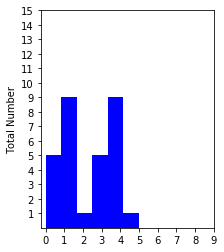

In [23]:
#Displaying the different bins
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
x=df5['Labels']
num_bins = num_clusters
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=1)
plt.subplots_adjust(left=.5)
plt.xticks(range(0, 10))
plt.yticks(range(1, 16))
plt.ylabel('Total Number')
plt.show()
%matplotlib inline

In [24]:
#Checking the centroid values by averaging the features of each cluster
df5.groupby('Labels').mean()

,distance,Like
Labels,,
0,5182.800000,2.600000
1,600.444444,3.333333
2,2713.000000,172.000000
3,1797.600000,0.600000
4,2834.000000,15.333333
5,8668.000000,0.000000


In [25]:
k_means_labels = k_means.labels_
k_means_labels

array([2, 4, 4, 4, 4, 1, 4, 1, 4, 0, 4, 0, 3, 4, 1, 1, 4, 1, 5, 1, 0, 1,
       3, 3, 0, 0, 3, 1, 3, 1], dtype=int32)

In [26]:
k_means_cluster_centers = k_means.cluster_centers_
pd.DataFrame(k_means_cluster_centers)

,0,1
0,1.349704,-0.297681
1,-1.020232,-0.274123
2,0.072354,5.144094
3,-0.401079,-0.361928
4,0.134934,0.111363
5,3.152205,-0.381203


In [27]:
#Name of shopping malls in cluster 0
df5.loc[df5['Labels']==0]

,name,distance,Like,Labels
27,Favorite Indian Restaurant,5261,9,0
18,Good Neighbor Seafood Restaurant,5178,4,0
20,Ohlone Yen Ching Restaurant,4901,0,0
24,Good Days Chinese Restaurant,5123,0,0
25,ZhiWei Restaurant,5451,0,0


In [28]:
#Name of shopping malls in cluster 1
df5.loc[df5['Labels']==1]

,name,distance,Like,Labels
5,Miga Korean Restaurant,350,14,1
7,Strizzi's Restaurant,920,11,1
4,La Sen Vietnamese Restaurant,251,2,1
3,Metropole Restaurant,234,2,1
16,China Dragon Restaurant,982,1,1
11,China Season Buffet Restaurant,672,0,1
14,Indian Chatkara Restaurant,811,0,1
2,Miso Japanese Restaurant,235,0,1
15,Shanghai gourmet restaurant,949,0,1


In [29]:
#Name of shopping malls in cluster 2
df5.loc[df5['Labels']==2]

,name,distance,Like,Labels
0,BJ's Restaurant & Brewhouse,2713,172,2


In [30]:
#Name of shopping malls in cluster 3
df5.loc[df5['Labels']==3]

,name,distance,Like,Labels
29,Yuk Wah Restaurant,1857,3,3
22,The Profilic Oven Restaurant,1572,0,3
23,Peach Garden Restaurant,1576,0,3
26,China Chef Restaurant,1712,0,3
28,A&W Restaurant,2271,0,3


In [31]:
#Name of shopping malls in cluster 4
df5.loc[df5['Labels']==4]

,name,distance,Like,Labels
9,Nijo Castle Sushi & Teppan Yaki Japanese Resta...,2914,40,4
1,Jack's Restaurant & Bar,2744,25,4
10,Dino's Family Restaurant,2534,21,4
19,Fremont Afghan Kabob Restaurant,2119,16,4
21,Lazy Dog Restaurant & Bar,2951,13,4
8,Vung Tau III Restaurant,3190,10,4
6,Li Zhou Seafood Restaurant,2820,9,4
13,My Tho Restaurant,3191,2,4
12,Mi Pueblo Restaurant,3043,2,4


In [32]:
#Name of shopping malls in cluster 5
df5.loc[df5['Labels']==5]

,name,distance,Like,Labels
17,Restaurant Technology Inc.,8668,0,5
